2023-11-12

BBME 520

Assignment 9 part A

Javid Jannat

In [1]:
import numpy as np 
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
import nibabel as nib
from matplotlib import pyplot as plt
import scipy

brain_data = datasets.fetch_oasis_vbm(n_subjects=100)

output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype= np.short) #gives 1 for females and 0 for males

data_n = output_variable.size
sets_n = 10

input_variables = [None]*sets_n

for i in range(sets_n):

    if not (i==0): # this saves time as we dont need to load all of the sets
        continue

    ROIS = (i+1)*100

    yeo = datasets.fetch_atlas_schaefer_2018(n_rois=ROIS)
    print('%i regions found in this atlas' % (len(np.unique( nib.load(yeo.maps).get_fdata().ravel())) - 1))

    masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache')
    input_variables[i] = masker.fit_transform(brain_data.gray_matter_maps)


C:\Users\Javid\AppData\Roaming\Python\Python311\site-packages\nilearn\input_data\__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)
C:\Users\Javid\AppData\Roaming\Python\Python311\site-packages\nilearn\datasets\struct.py:850: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


100 regions found in this atlas


In [2]:
import sklearn
from sklearn import neural_network
from sklearn import calibration

p_trainer_maker = sklearn.neural_network.MLPClassifier

In [3]:
# task 1
layer_list = [tuple([10]*(i+1)) for i in range(5)]
alpha_list = [0.0001 , 0.001 , 0.01 , 0.1 , 1.0]

out = output_variable
inp = input_variables[0]

NINETY = int(out.size*0.9)
linspace = np.arange(out.size)
train = linspace < NINETY
test = linspace >= NINETY

outsamp_accuracies = np.zeros((5,5))
insamp_accuracies = np.zeros((5,5))

for i,layers in enumerate(layer_list):
    for j,alpha in enumerate(alpha_list):
        model = p_trainer_maker(hidden_layer_sizes=layers, activation='relu', alpha=alpha, max_iter= 2000).fit(inp[train],out[train])
        outsamp_accuracies[i,j] = model.score(inp[test],out[test])
        insamp_accuracies[i,j] = model.score(inp[train],out[train])

outsamp_accuracies *= 100
insamp_accuracies *= 100

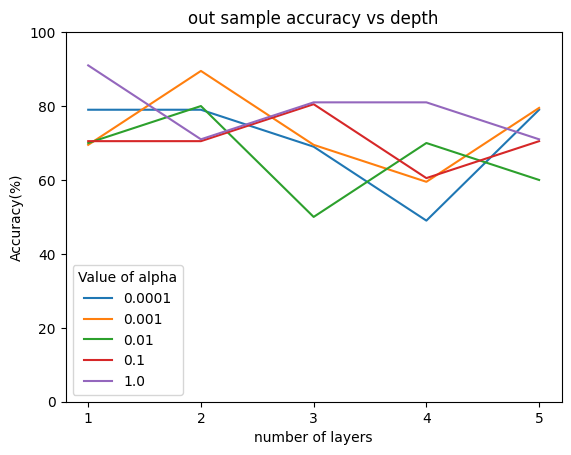

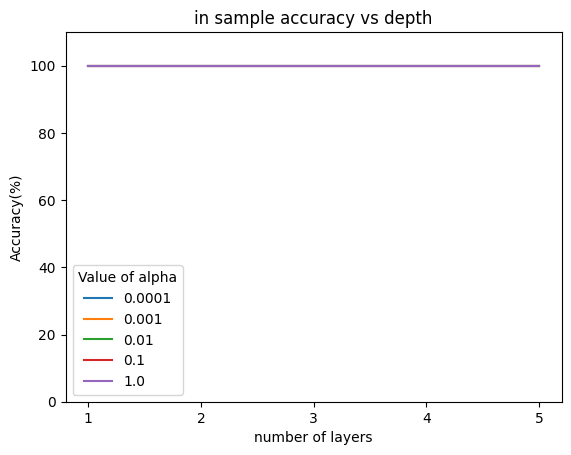

In [4]:
offset = np.array([-2,-1,0,1,2])*0.5
plt.plot(outsamp_accuracies+offset)
plt.legend(alpha_list,title='Value of alpha');
plt.xticks(np.arange(5),np.arange(5)+1);
plt.ylabel('Accuracy(%)');
plt.xlabel('number of layers')
plt.ylim([0,100])
plt.title('')
plt.title('out sample accuracy vs depth')
plt.show()

plt.plot(insamp_accuracies)
plt.legend(alpha_list,title='Value of alpha');
plt.xticks(np.arange(5),np.arange(5)+1);
plt.ylabel('Accuracy(%)');
plt.xlabel('number of layers')
plt.ylim([0,110])
plt.title('in sample accuracy vs depth')
plt.show()

In [5]:
# task 2
layer_list = [5,10,25,50,100]
alpha_list = [0.0001 , 0.001 , 0.01 , 0.1 , 1.0]

out = output_variable
inp = input_variables[0]

NINETY = int(out.size*0.9)
linspace = np.arange(out.size)
train = linspace < NINETY
test = linspace >= NINETY

outsamp_accuracies = np.zeros((5,5))
insamp_accuracies = np.zeros((5,5))

for i,layers in enumerate(layer_list):
    for j,alpha in enumerate(alpha_list):
        model = p_trainer_maker(hidden_layer_sizes=layers, activation='relu', alpha=alpha, max_iter= 2000).fit(inp[train],out[train])
        outsamp_accuracies[i,j] = model.score(inp[test],out[test])
        insamp_accuracies[i,j] = model.score(inp[train],out[train])

outsamp_accuracies *= 100
insamp_accuracies *= 100

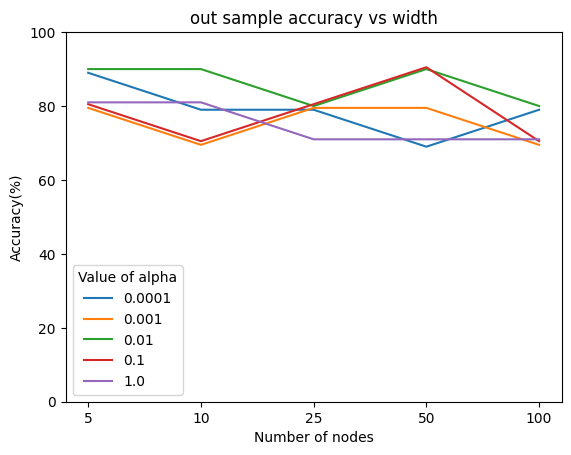

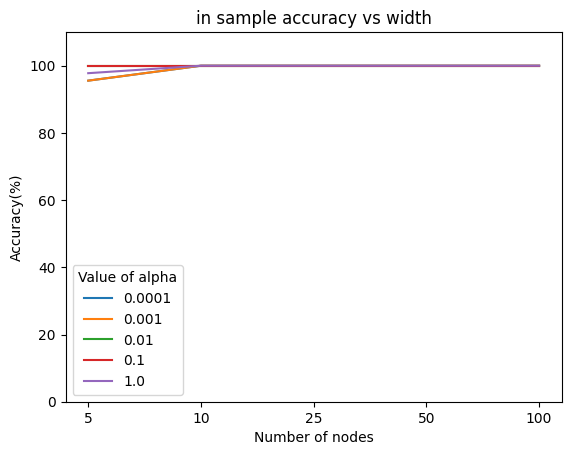

In [6]:
offset = np.array([-2,-1,0,1,2])*0.5
plt.plot(outsamp_accuracies+offset)
plt.legend(alpha_list,title='Value of alpha');
plt.xticks(np.arange(5),layer_list)
plt.ylabel('Accuracy(%)');
plt.xlabel('Number of nodes')
plt.ylim([0,100])
plt.title('')
plt.title('out sample accuracy vs width')
plt.show()

plt.plot(insamp_accuracies)
plt.legend(alpha_list,title='Value of alpha');
plt.xticks(np.arange(5),layer_list)
plt.ylabel('Accuracy(%)');
plt.xlabel('Number of nodes')
plt.ylim([0,110])
plt.title('in sample accuracy vs width')
plt.show()

In [7]:
# task 3
func_list = ['identity', 'logistic', 'tanh', 'relu']
alpha_list = [0.0001 , 0.001 , 0.01 , 0.1 , 1.0]

out = output_variable
inp = input_variables[0]

NINETY = int(out.size*0.9)
linspace = np.arange(out.size)
train = linspace < NINETY
test = linspace >= NINETY

outsamp_accuracies = np.zeros((4,5))
insamp_accuracies = np.zeros((4,5))

for i,func in enumerate(func_list):
    for j,alpha in enumerate(alpha_list):
        model = p_trainer_maker(hidden_layer_sizes=(10,), activation=func, alpha=alpha, max_iter= 2000).fit(inp[train],out[train])
        outsamp_accuracies[i,j] = model.score(inp[test],out[test])
        insamp_accuracies[i,j] = model.score(inp[train],out[train])

outsamp_accuracies *= 100
insamp_accuracies *= 100

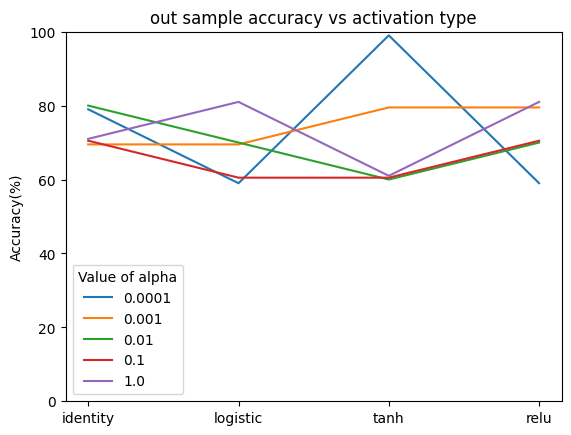

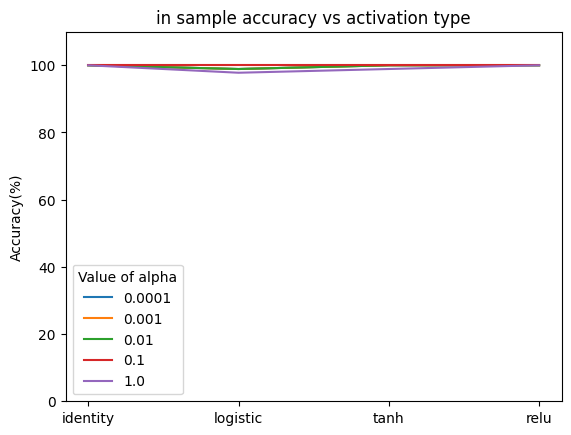

In [8]:
offset = np.array([-2,-1,0,1,2])*0.5
plt.plot(outsamp_accuracies+offset)
plt.legend(alpha_list,title='Value of alpha');
plt.xticks(np.arange(4),func_list);
plt.ylabel('Accuracy(%)');
plt.ylim([0,100])
plt.title('out sample accuracy vs activation type')
plt.show()

plt.plot(insamp_accuracies)
plt.legend(alpha_list,title='Value of alpha');
plt.xticks(np.arange(4),func_list);
plt.ylabel('Accuracy(%)');
plt.ylim([0,110])
plt.title('in sample accuracy vs activation type')
plt.show()

In [9]:
# task 4
layer_list = [tuple([10]*(i+1)) for i in range(5)]

out = output_variable
inp = input_variables[0]

NINETY = int(out.size*0.9)
linspace = np.arange(out.size)
train = linspace < NINETY
test = linspace >= NINETY

outsamp_accuracies = np.zeros((5,100))
insamp_accuracies = np.zeros((5,100))

for i,layers in enumerate(layer_list):
    for j in range(100):
        model = p_trainer_maker(hidden_layer_sizes=layers, activation='relu', alpha=0.0001, max_iter= 1000, random_state=j).fit(inp[train],out[train])
        outsamp_accuracies[i,j] = model.score(inp[test],out[test])
        insamp_accuracies[i,j] = model.score(inp[train],out[train])

outsamp_accuracies *= 100
insamp_accuracies *= 100

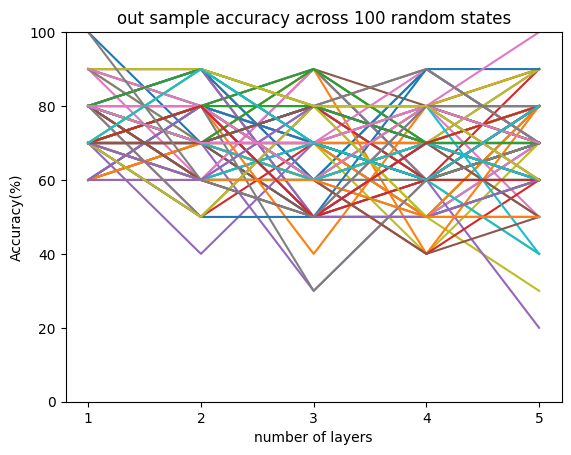

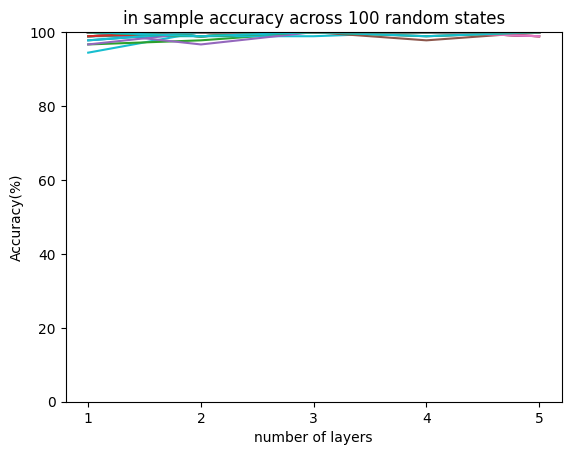

In [13]:
plt.plot(outsamp_accuracies)
plt.xticks(np.arange(5),np.arange(5)+1);
plt.ylabel('Accuracy(%)');
plt.xlabel('number of layers')
plt.ylim([0,100])
plt.title('')
plt.title('out sample accuracy across 100 random states')
plt.show()

plt.plot(insamp_accuracies)
plt.xticks(np.arange(5),np.arange(5)+1);
plt.ylabel('Accuracy(%)');
plt.xlabel('number of layers')
plt.ylim([0,100])
plt.title('in sample accuracy across 100 random states')
plt.show()

In [11]:
#task 5

func_list = ['identity', 'logistic', 'tanh', 'relu', 'LogReg']
p_trainers = []

for func in func_list:
    if func=='LogReg':
        p_trainers.append(sklearn.linear_model.LogisticRegression(penalty='l2',C=1.0 , max_iter= 10000))
        continue

    p_trainers.append(p_trainer_maker(hidden_layer_sizes=(10,), activation=func, alpha=0.0001, max_iter= 2000))


predictions = [np.zeros(data_n) for i in range(5)]
splits_n = 10
splitter = sklearn.model_selection.KFold(n_splits=splits_n, shuffle=False)

out = output_variable
inp = input_variables[0]

index_generator = splitter.split(inp,out)

for train,test in index_generator:
    for i,pt in enumerate(p_trainers):

        model= pt.fit(inp[train],out[train])

        predictions[i][test] = model.predict_proba(inp[test])[:,1]

c_curve = []

for i,p in enumerate(predictions):
    c_curve.append(sklearn.calibration.calibration_curve(out,p))

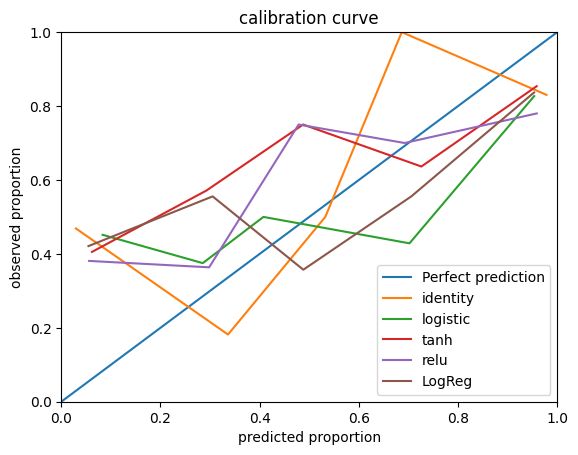

In [12]:
x = np.arange(0,1.25,0.25)
plt.plot(x,x)
for c in c_curve:
    plt.plot(c[1],c[0])
plt.title("calibration curve")
plt.ylim([0,1])
plt.xlim([0,1])
plt.legend(['Perfect prediction']+func_list)
plt.xlabel('predicted proportion');
plt.ylabel('observed proportion');